# **Prediction** : **_Leave_** **or** **_Not_**


# **_Importing Libraries_**


In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

# **_Data Understanding_**


### 1. Download Raw Data


In [359]:
# "https://github.com/anonyblank/mid-term/blob/main/datasets/Employee.csv"
# https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

### 2. Load Raw Data


In [360]:
raw_data = pd.read_csv("datasets/Employee.csv")
raw_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# **_EDA_**


## 1. Missing Values


In [361]:
missing_values = raw_data.isnull().sum()

## 2. Descriptive Statistics


In [362]:
descriptive_statistics = raw_data.describe()
descriptive_statistics

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## 3. count values for each sub-group


In [363]:
from IPython.display import display

for col in raw_data.columns.values:
    print(f"-----{col}-----")
    print()

    display(raw_data[col].unique()[:3])
    print()

    display(raw_data[col].value_counts())
    print(f"-----{col} END-----")
    print()

-----Education-----



array(['Bachelors', 'Masters', 'PHD'], dtype=object)

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

-----Education END-----

-----JoiningYear-----



array([2017, 2013, 2014])

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

-----JoiningYear END-----

-----City-----



array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

-----City END-----

-----PaymentTier-----



array([3, 1, 2])

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

-----PaymentTier END-----

-----Age-----



array([34, 28, 38])

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

-----Age END-----

-----Gender-----



array(['Male', 'Female'], dtype=object)

Male      2778
Female    1875
Name: Gender, dtype: int64

-----Gender END-----

-----EverBenched-----



array(['No', 'Yes'], dtype=object)

No     4175
Yes     478
Name: EverBenched, dtype: int64

-----EverBenched END-----

-----ExperienceInCurrentDomain-----



array([0, 3, 2])

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

-----ExperienceInCurrentDomain END-----

-----LeaveOrNot-----



array([0, 1])

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

-----LeaveOrNot END-----



## 4. feature importance: leave or (churn) rate and risk ratio


In [364]:
# global leave or (churn) rate
raw_data["LeaveOrNot"].value_counts(normalize=True)
global_leave_rate = raw_data["LeaveOrNot"].mean()

global_leave_rate

0.3438641736514077

In [365]:
raw_data["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [366]:
# leave or (churn) rate for Bachelors
bachelors_leave_rate = raw_data[raw_data["Education"] == "Bachelors"].LeaveOrNot.mean()
bachelors_leave_rate

0.3135240211052485

In [367]:
# leave or (churn) rate for Masters
masters_leave_rate = raw_data[raw_data["Education"] == "Masters"].LeaveOrNot.mean()
masters_leave_rate

0.4879725085910653

In [368]:
# leave or (churn) rate for PHD
phd_leave_rate = raw_data[raw_data["Education"] == "PHD"].LeaveOrNot.mean()
phd_leave_rate

0.25139664804469275

In [369]:
# Difference global and bachelor
global_leave_rate - bachelors_leave_rate

0.030340152546159183

In [370]:
# Difference global and master
global_leave_rate - masters_leave_rate

-0.14410833493965758

In [371]:
# Difference global and phd
global_leave_rate - phd_leave_rate

0.09246752560671495

In [372]:
# Risk Ratio for bachelor
bachelors_leave_rate / global_leave_rate

0.9117670438767008

In [373]:
# Risk Ratio for master
masters_leave_rate / global_leave_rate

1.4190850515463918

In [374]:
# Risk Ratio for phd
phd_leave_rate / global_leave_rate

0.7310928770949721

In [375]:
for col in raw_data.columns.values:
    df = raw_data.groupby(col).LeaveOrNot.agg(["mean", "count"])
    df["diff"] = df["mean"] - global_leave_rate
    df["risk"] = df["mean"] / global_leave_rate
    display(df)

,mean,count,diff,risk
Education,,,,
Bachelors,0.313524,3601,-0.030340,0.911767
Masters,0.487973,873,0.144108,1.419085
PHD,0.251397,179,-0.092468,0.731093


,mean,count,diff,risk
JoiningYear,,,,
2012,0.216270,504,-0.127594,0.628940
2013,0.334828,669,-0.009036,0.973722
2014,0.247496,699,-0.096368,0.719751
2015,0.407170,781,0.063306,1.184102
2016,0.222857,525,-0.121007,0.648096
2017,0.268051,1108,-0.075814,0.779524
2018,0.986376,367,0.642512,2.868505


,mean,count,diff,risk
City,,,,
Bangalore,0.267056,2228,-0.076809,0.776631
New Delhi,0.316335,1157,-0.027529,0.919943
Pune,0.503943,1268,0.160079,1.465530


,mean,count,diff,risk
PaymentTier,,,,
1,0.366255,243,0.022391,1.065116
2,0.599129,918,0.255264,1.742341
3,0.275200,3492,-0.068664,0.800317


,mean,count,diff,risk
Age,,,,
22,0.387755,49,0.043891,1.127640
23,0.333333,48,-0.010531,0.969375
24,0.397403,385,0.053538,1.155696
25,0.421053,418,0.077188,1.224474
26,0.345736,645,0.001872,1.005445
27,0.361600,625,0.017736,1.051578
28,0.295238,630,-0.048626,0.858589
29,0.326087,230,-0.017777,0.948302
30,0.350000,220,0.006136,1.017844


,mean,count,diff,risk
Gender,,,,
Female,0.471467,1875,0.127602,1.371084
Male,0.257739,2778,-0.086125,0.749538


,mean,count,diff,risk
EverBenched,,,,
No,0.331257,4175,-0.012607,0.963338
Yes,0.453975,478,0.110111,1.320216


,mean,count,diff,risk
ExperienceInCurrentDomain,,,,
0,0.349296,355,0.005432,1.015796
1,0.336918,558,-0.006947,0.979798
2,0.367065,1087,0.023201,1.067472
3,0.380407,786,0.036543,1.106271
4,0.319012,931,-0.024852,0.927726
5,0.313384,919,-0.030480,0.911360
6,0.250000,8,-0.093864,0.727031
7,0.333333,9,-0.010531,0.969375


,mean,count,diff,risk
LeaveOrNot,,,,
0,0.0,3053,-0.343864,0.000000
1,1.0,1600,0.656136,2.908125


## 5. feature importance: mutual infomation


In [376]:
from sklearn.metrics import mutual_info_score

categorical = ["Education", "City", "PaymentTier", "Gender", "EverBenched"]

In [377]:
raw_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [378]:
# mutual info score for education
mutual_info_score(raw_data.LeaveOrNot, raw_data.Education)

0.010591509336075243

In [379]:
# mutual info score for city
mutual_info_score(raw_data.LeaveOrNot, raw_data.City)

0.0216323522969529

In [380]:
def mutual_info_leave_score(series):
    return mutual_info_score(raw_data.LeaveOrNot, series)


# mutual info score for categorical variables
mi = raw_data[categorical].apply(mutual_info_leave_score)
mi.sort_values(ascending=False)

PaymentTier    0.034851
Gender         0.024192
City           0.021632
Education      0.010592
EverBenched    0.002969
dtype: float64

## 6. feature importance: correlation


### correlation for numerical variables


In [381]:
numerical = ["JoiningYear", "Age", "ExperienceInCurrentDomain"]

In [382]:
raw_data[numerical].corrwith(raw_data["LeaveOrNot"])

JoiningYear                  0.181705
Age                         -0.051126
ExperienceInCurrentDomain   -0.030504
dtype: float64

### positive correlation


In [383]:
raw_data[raw_data["JoiningYear"] <= 2012].LeaveOrNot.mean()

0.21626984126984128

In [384]:
raw_data[
    (raw_data["JoiningYear"] > 2012) & (raw_data["JoiningYear"] <= 2015)
].LeaveOrNot.mean()

0.33271288971614704

In [385]:
raw_data[raw_data["JoiningYear"] > 2015].LeaveOrNot.mean()

0.388

### negative correlation


In [386]:
raw_data[raw_data["Age"] < 25].LeaveOrNot.mean()

0.3900414937759336

In [387]:
raw_data[(raw_data["Age"] > 24) & (raw_data["Age"] <= 35)].LeaveOrNot.mean()

0.346537558685446

In [388]:
raw_data[raw_data["Age"] > 35].LeaveOrNot.mean()

0.30275229357798167

# **_Data Preprocessing_**


## 1. convert column names to lower


In [389]:
raw_data.columns = raw_data.columns.str.lower()

In [390]:
for column in list(raw_data.dtypes[raw_data.dtypes == "object"].index):
    raw_data[column] = raw_data[column].str.lower().str.replace(" ", "_")

# raw_data['everbenched'] = (raw_data['everbenched'] == 'yes').astype('int')
raw_data

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,bachelors,2017,bangalore,3,34,male,no,0,0
1,bachelors,2013,pune,1,28,female,no,3,1
2,bachelors,2014,new_delhi,3,38,female,no,2,0
3,masters,2016,bangalore,3,27,male,no,5,1
4,masters,2017,pune,3,24,male,yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,bachelors,2013,bangalore,3,26,female,no,4,0
4649,masters,2013,pune,2,37,male,no,2,1
4650,masters,2018,new_delhi,3,27,male,no,5,1
4651,bachelors,2012,bangalore,3,30,male,yes,2,0


## 2. setting up validation framework


In [391]:
from sklearn.model_selection import train_test_split

In [392]:
# splitting data into full train and test datasets
full_train_datasets, test_datasets = train_test_split(
    raw_data, test_size=0.1, random_state=1
)

In [393]:
# splitting data into train and val datasets
train_datasets, val_datasets = train_test_split(
    full_train_datasets, test_size=0.1111, random_state=1
)

In [394]:
train_datasets = train_datasets.reset_index(drop=True)
train_datasets

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,bachelors,2015,pune,3,35,female,no,1,1
1,bachelors,2017,pune,3,30,male,no,2,0
2,masters,2017,new_delhi,2,31,male,no,4,0
3,bachelors,2015,bangalore,3,26,female,no,4,0
4,masters,2017,pune,2,26,male,no,4,0
...,...,...,...,...,...,...,...,...,...
3716,bachelors,2013,new_delhi,3,29,female,no,1,0
3717,bachelors,2017,new_delhi,2,36,male,no,3,0
3718,bachelors,2017,new_delhi,3,25,female,no,3,0
3719,bachelors,2017,bangalore,3,30,male,no,1,0


In [395]:
full_train_datasets = full_train_datasets.reset_index(drop=True)
full_train_datasets

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,bachelors,2016,bangalore,3,30,female,no,1,0
1,masters,2018,new_delhi,3,26,female,no,4,1
2,bachelors,2016,bangalore,3,34,male,yes,1,0
3,bachelors,2017,new_delhi,2,41,female,no,3,0
4,phd,2018,new_delhi,3,24,female,no,2,1
...,...,...,...,...,...,...,...,...,...
4182,bachelors,2017,new_delhi,2,28,male,no,2,0
4183,bachelors,2017,bangalore,3,27,male,no,5,1
4184,masters,2017,bangalore,3,28,male,no,1,1
4185,bachelors,2018,bangalore,3,38,male,no,6,1


In [396]:
val_datasets = val_datasets.reset_index(drop=True)
val_datasets

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,masters,2015,new_delhi,3,40,male,no,2,0
1,phd,2013,bangalore,3,35,male,no,3,1
2,bachelors,2016,bangalore,3,27,male,no,5,0
3,bachelors,2016,pune,2,36,male,no,0,1
4,masters,2017,new_delhi,2,25,male,yes,3,1
...,...,...,...,...,...,...,...,...,...
461,bachelors,2013,bangalore,3,27,female,no,5,0
462,masters,2014,bangalore,3,24,female,no,2,0
463,bachelors,2015,pune,1,24,female,yes,2,1
464,bachelors,2014,bangalore,3,27,male,no,5,1


In [397]:
test_datasets = test_datasets.reset_index(drop=True)
test_datasets

,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,bachelors,2017,new_delhi,2,26,male,no,4,0
1,bachelors,2012,bangalore,3,28,male,no,2,0
2,bachelors,2012,bangalore,3,27,male,no,5,0
3,masters,2017,new_delhi,3,28,male,no,0,0
4,bachelors,2014,pune,2,37,female,no,5,1
...,...,...,...,...,...,...,...,...,...
461,masters,2012,new_delhi,3,27,male,no,5,1
462,bachelors,2017,new_delhi,3,34,female,no,2,1
463,bachelors,2017,bangalore,3,28,male,no,3,0
464,bachelors,2015,bangalore,3,38,male,yes,2,0


In [398]:
full_train_labels = full_train_datasets.leaveornot.values
train_labels = train_datasets.leaveornot.values
val_labels = val_datasets.leaveornot.values
test_labels = test_datasets.leaveornot.values

In [399]:
del full_train_datasets["leaveornot"]
del train_datasets["leaveornot"]
del val_datasets["leaveornot"]
del test_datasets["leaveornot"]

## 3. Prepare Features


In [400]:
from sklearn.feature_extraction import DictVectorizer

In [401]:
dv = DictVectorizer(sparse=False)

In [402]:
full_train_dict = full_train_datasets.to_dict(orient="records")
train_dict = train_datasets.to_dict(orient="records")
val_dict = val_datasets.to_dict(orient="records")
test_dict = test_datasets.to_dict(orient="records")

In [403]:
full_train_features = dv.fit_transform(full_train_dict)
train_features = dv.transform(train_dict)
val_features = dv.transform(val_dict)
test_features = dv.transform(test_dict)

# **_Modelling_**


## 1. Train with Logistic Regression


In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [405]:
score_list = []

for C in np.linspace(0.001, 2.0, 30):
    model = LogisticRegression(max_iter=1000, C=C)
    model.fit(train_features, train_labels)

    val_pred_labels = model.predict_proba(val_features)[:, 1]
    val_pred_labels = (val_pred_labels >= 0.5).astype("int")

    rmse = np.sqrt(mean_squared_error(val_labels, val_pred_labels))
    accuracy = accuracy_score(val_labels, val_pred_labels)

    score_list.append((C, rmse, accuracy))
score_list

[(0.001, 0.5692401380471589, 0.6759656652360515),
 (0.06993103448275863, 0.49892588490336864, 0.7510729613733905),
 (0.13886206896551725, 0.4946060989646683, 0.7553648068669528),
 (0.2077931034482759, 0.49892588490336864, 0.7510729613733905),
 (0.2767241379310345, 0.49677068742008956, 0.7532188841201717),
 (0.3456551724137931, 0.4946060989646683, 0.7553648068669528),
 (0.4145862068965518, 0.49677068742008956, 0.7532188841201717),
 (0.4835172413793104, 0.4946060989646683, 0.7553648068669528),
 (0.552448275862069, 0.4946060989646683, 0.7553648068669528),
 (0.6213793103448276, 0.49677068742008956, 0.7532188841201717),
 (0.6903103448275862, 0.49677068742008956, 0.7532188841201717),
 (0.7592413793103449, 0.49677068742008956, 0.7532188841201717),
 (0.8281724137931036, 0.49677068742008956, 0.7532188841201717),
 (0.8971034482758622, 0.49677068742008956, 0.7532188841201717),
 (0.9660344827586208, 0.49677068742008956, 0.7532188841201717),
 (1.0349655172413792, 0.49677068742008956, 0.753218884120

In [406]:
score_list_df = pd.DataFrame(score_list, columns=["C", "RMSE", "Accuracy"])

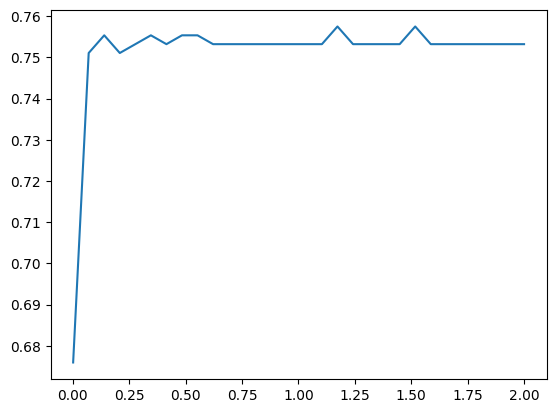

In [407]:
plt.plot(score_list_df.C, score_list_df.Accuracy)

## 2. Train with dicision tree


In [408]:
from sklearn.tree import DecisionTreeClassifier

In [409]:
auc_score_list = []
for d in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]:
    for sample in [10, 20, 30, 50, 100, 200, 500]:
        model = DecisionTreeClassifier(max_depth=d, min_samples_leaf=sample)
        model.fit(train_features, train_labels)

        val_pred_labels = model.predict_proba(val_features)[:, 1]
        auc = roc_auc_score(val_labels, val_pred_labels)
        auc_score_list.append((d, sample, auc))

In [410]:
auc_score_df = pd.DataFrame(
    auc_score_list, columns=["max_depth", "min_sample_leaf", "auc"]
)
auc_score_df.sort_values(by="auc", ascending=False)

,max_depth,min_sample_leaf,auc
66,10.0,50,0.896521
73,15.0,50,0.896205
87,NaN,50,0.896205
80,20.0,50,0.896205
59,9.0,50,0.895627
...,...,...,...
5,1.0,200,0.619205
4,1.0,100,0.619205
3,1.0,50,0.619205
2,1.0,30,0.619205


## 3. Train with Random Forest


In [411]:
from sklearn.ensemble import RandomForestClassifier

In [412]:
rf_auc_score = []
for d in [5, 10, 15, 20]:
    for n in range(1, 251, 10):
        model = RandomForestClassifier(
            n_estimators=n, max_depth=d, random_state=1, n_jobs=-1
        )
        model.fit(train_features, train_labels)

        val_pred_labels = model.predict_proba(val_features)[:, 1]

        auc = roc_auc_score(val_labels, val_pred_labels)
        rf_auc_score.append((n, d, auc))

In [413]:
rf_auc_score_df = pd.DataFrame(
    rf_auc_score, columns=["n_estimators", "max_depth", "auc"]
)
rf_auc_score_df

,n_estimators,max_depth,auc
0,1,5,0.799243
1,11,5,0.880742
2,21,5,0.883685
3,31,5,0.885063
4,41,5,0.883118
...,...,...,...
95,201,20,0.880805
96,211,20,0.880826
97,221,20,0.880910
98,231,20,0.881278


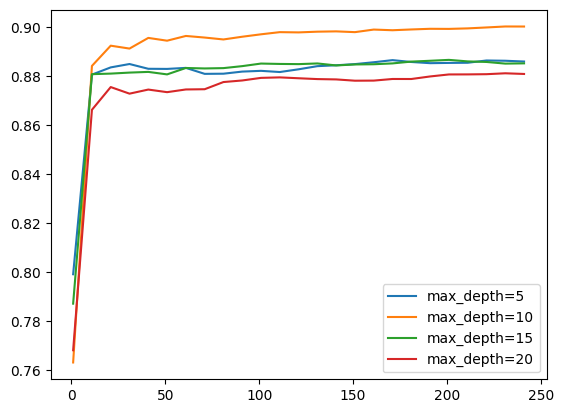

In [414]:
for d in [5, 10, 15, 20]:
    subset_df = rf_auc_score_df[rf_auc_score_df["max_depth"] == d]
    plt.plot(subset_df.n_estimators, subset_df.auc, label="max_depth=%d" % d)

plt.legend()

In [415]:
max_depth = 10

In [416]:
rf_auc_score = []
for s in [5, 10, 15, 20]:
    for n in range(1, 251, 10):
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=max_depth,
            min_samples_leaf=s,
            random_state=1,
            n_jobs=-1,
        )
        model.fit(train_features, train_labels)

        val_pred_labels = model.predict_proba(val_features)[:, 1]

        auc = roc_auc_score(val_labels, val_pred_labels)
        rf_auc_score.append((n, s, auc))

In [417]:
rf_auc_score_df = pd.DataFrame(
    rf_auc_score, columns=["n_estimators", "min_sample_leaf", "auc"]
)
rf_auc_score_df

,n_estimators,min_sample_leaf,auc
0,1,5,0.850321
1,11,5,0.884894
2,21,5,0.890066
3,31,5,0.892589
4,41,5,0.893872
...,...,...,...
95,201,20,0.893493
96,211,20,0.893514
97,221,20,0.893535
98,231,20,0.893052


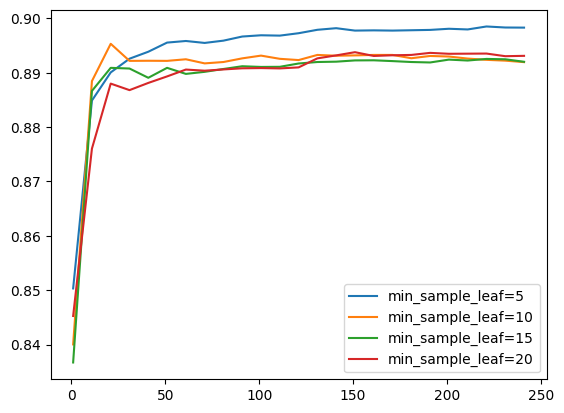

In [418]:
for s in [5, 10, 15, 20]:
    subset_df = rf_auc_score_df[rf_auc_score_df["min_sample_leaf"] == s]
    plt.plot(subset_df.n_estimators, subset_df.auc, label="min_sample_leaf=%s" % s)

plt.legend()

In [419]:
model = RandomForestClassifier(
    n_estimators=50, max_depth=max_depth, min_samples_leaf=5, random_state=1, n_jobs=-1
)
model.fit(train_features, train_labels)

val_pred_labels = model.predict_proba(val_features)[:, 1]

auc = roc_auc_score(val_labels, val_pred_labels)
auc

0.8958267633764322

## 4. Train with XGBoost


In [420]:
import xgboost as xgb

In [421]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(train_features, label=train_labels,
                     feature_names=features)
dval = xgb.DMatrix(val_features, label=val_labels, feature_names=features)

### 1. train with default params


In [422]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [423]:
val_pred_labels = model.predict(dval)

In [424]:
roc_auc_score(val_labels, val_pred_labels)

0.9059497529696205

### 2. analysis overfiting


In [425]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [426]:
%%capture output
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)

In [427]:
def parse_xgb_output(output):
    result = []
    for line in output.stdout.strip().split("\n"):
        iter_line, train_line, val_line = line.split("\t")

        iter = int(iter_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])

        result.append((iter, train, val))

    columns = ["num_iters", "train_auc", "val_auc"]
    result_df = pd.DataFrame(result, columns=columns)
    return result_df

In [428]:
xgb_score_df = parse_xgb_output(output)

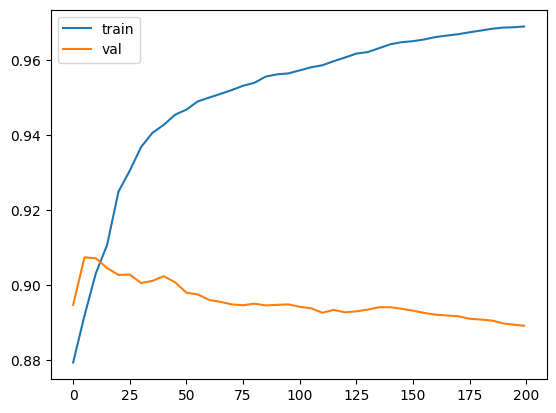

In [429]:
plt.plot(xgb_score_df.num_iters, xgb_score_df.train_auc, label="train")
plt.plot(xgb_score_df.num_iters, xgb_score_df.val_auc, label="val")
plt.legend()

### 3. tuning 'eta' parameter


In [430]:
score = {}

In [431]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
score[key] = parse_xgb_output(output)


In [432]:
%%capture output

xgb_params = {
    'eta' : 0.01,
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
score[key] = parse_xgb_output(output)


In [433]:
%%capture output

xgb_params = {
    'eta' : 1.0,
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
score[key] = parse_xgb_output(output)


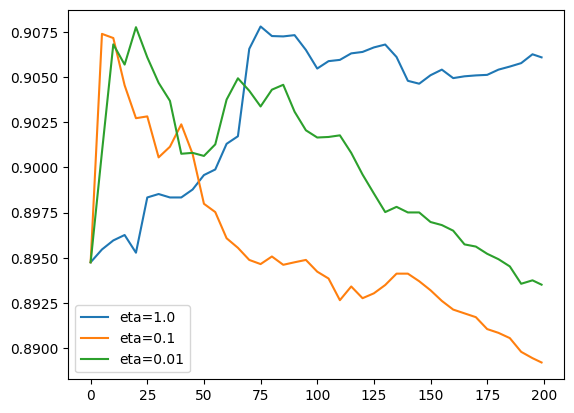

In [434]:
etas = ["eta=1.0", "eta=0.1", "eta=0.01"]
for eta in etas:
    plt.plot(score[eta].num_iters, score[eta].val_auc, label=eta)
plt.legend()

### 4. tuning 'max_depth' parameter


In [446]:
score = {}

In [447]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 1,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
score[key] = parse_xgb_output(output)


In [448]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 3,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
score[key] = parse_xgb_output(output)


In [449]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 5,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
score[key] = parse_xgb_output(output)


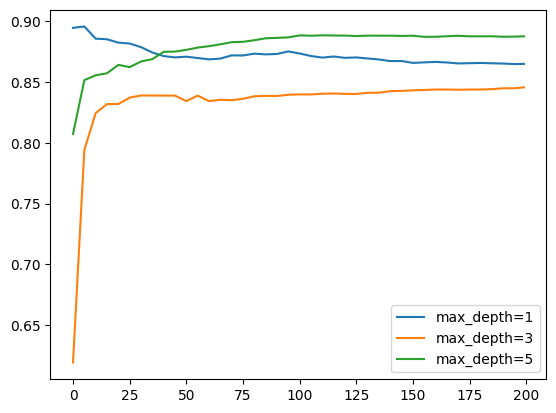

In [450]:
for d, score_df in score.items():
    plt.plot(score_df.num_iters, score_df.val_auc, label=d)
plt.legend()

### 5. tuning 'min_child_weight' parameter


In [487]:
score = {}

In [488]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 3,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
score[key] = parse_xgb_output(output)


In [489]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 3,
    'min_child_weight' : 10,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
score[key] = parse_xgb_output(output)


In [490]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 3,
    'min_child_weight' : 30,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1,
  }
model = xgb.train(xgb_params, dtrain, num_boost_round=200,verbose_eval=5, evals=watchlist)
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
score[key] = parse_xgb_output(output)


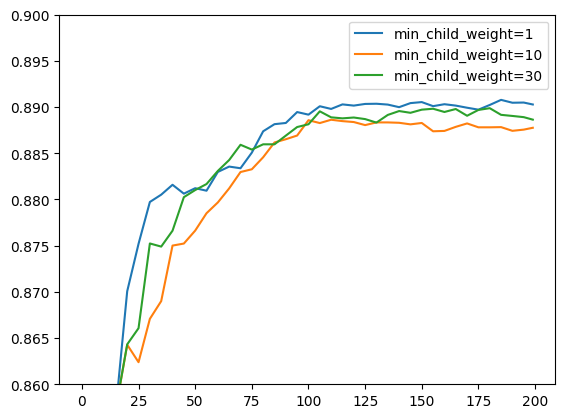

In [491]:
for min, score_df in score.items():
    plt.plot(score_df.num_iters, score_df.val_auc, label=min)
plt.ylim(0.86, 0.90)
plt.legend()

In [502]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 5,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=180)

In [503]:
val_pred_labels = model.predict(dval)
roc_auc_score(val_labels, val_pred_labels)

0.8989172711027016

### 6. train final model


In [504]:
dv = DictVectorizer(sparse=False)

full_train_features = dv.fit_transform(full_train_dict)
test_features = dv.transform(test_dict)

In [505]:
dfull_train = xgb.DMatrix(
    full_train_features, label=full_train_labels, feature_names=features
)
dtest = xgb.DMatrix(test_features, feature_names=features)

xgb_params = {
    "eta": 0.1,
    "max_depth": 5,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}
model = xgb.train(xgb_params, dfull_train, num_boost_round=180)
test_pred_labels = model.predict(dtest)

auc = roc_auc_score(test_labels, test_pred_labels)
auc

0.8610565063213074

# **_Saving Model_**


In [507]:
import pickle

In [509]:
with open("model/model.bin", "wb") as f_out:  # 'wb' means write-binary
    pickle.dump((dv, model), f_out)

In [510]:
import pickle

with open(
    "model/model.bin", "rb"
) as f_in:  # very important to use 'rb' here, it means read-binary
    dict_vectorizer, model = pickle.load(f_in)